# Regression intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns

In [2]:
X, y = make_regression(n_features=1,noise=10,random_state=42,bias=100)

In [3]:
df = pd.DataFrame(np.hstack((X,y.reshape(-1,1))),columns=['x1','y'])

In [4]:
df['x0'] = 1

In [5]:
df.head()

,x1,y,x0
0,0.931280,150.779929,1
1,0.087047,89.934730,1
2,-1.057711,65.081608,1
3,0.314247,110.526743,1
4,-0.479174,82.261623,1


In [6]:
def plot_regression(x,y,y_hat,figsize=(12,5)):
    fig, ax = plt.subplots(1,2,figsize=figsize)
    
    ax[0].scatter(x,y)
    ax[0].plot(x, y_hat,'k.')
    
    ax[1].plot(y)
    ax[1].plot(y_hat,)

## Fitting a linear regression model

### revisiting psuedo inverse 

theta : [101.16511532  44.43716999]


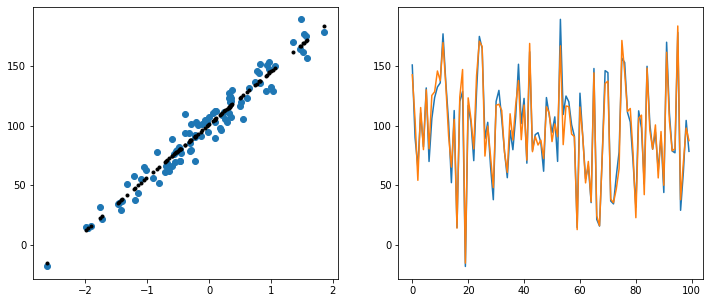

In [7]:
theta = np.linalg.pinv(df[['x0','x1']].values) @ df.y.values
print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta

plot_regression(df.x1,df.y, y_hat)

### revisiting svd and linear systems

theta : [101.16511532  44.43716999]


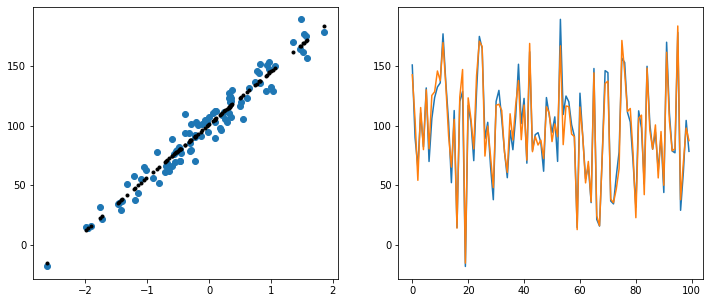

In [8]:
u,s,vT = np.linalg.svd(df[['x0','x1']].values,full_matrices=False) 

theta = vT.T @ np.linalg.pinv(np.diag(s)) @ u.T @ df.y

print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta
plot_regression(df.x1,df.y, y_hat)

### good old sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model = model.fit(df[['x0','x1']].values,df.y.values)

In [11]:
y_hat = model.predict(df[['x0','x1']].values)

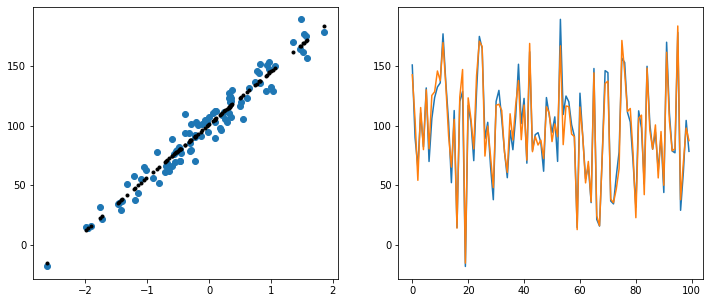

In [12]:
plot_regression(df.x1,df.y, y_hat)

## lets try something with Neural Networks

In [13]:
import tensorflow as tf

### A neural net like perceptron

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

In [28]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


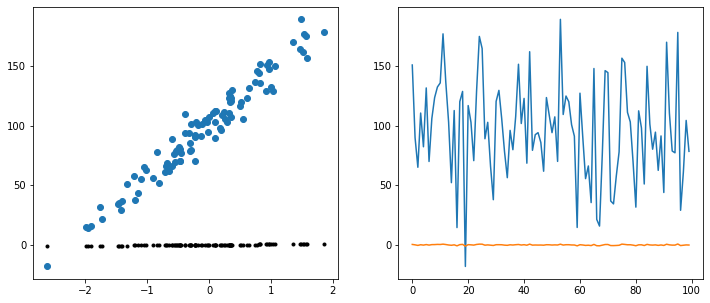

In [30]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

it is not trained yet. so result is understandable.

In [31]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error','mean_squared_error']
)

In [39]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=1000,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

In [46]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

In [47]:
history_metrics.head()

,loss,val_loss,epochs
0,77.487457,72.030106,0
1,77.284004,71.840919,1
2,77.076927,71.651726,2
3,76.875336,71.465134,3
4,76.667824,71.275780,4


<AxesSubplot:xlabel='epochs'>

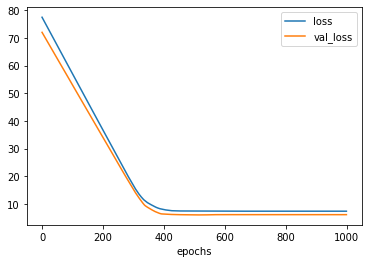

In [49]:
history_metrics.plot(x='epochs')

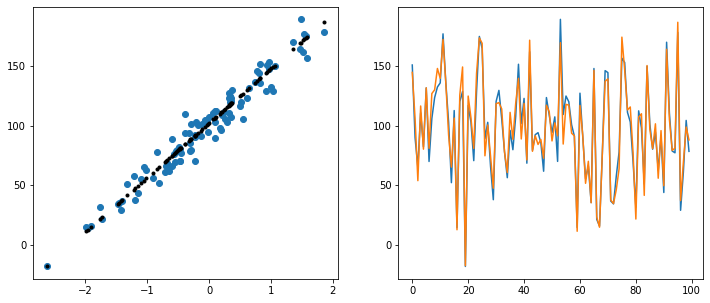

In [50]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

### A little bit deep neural net but no activation functions

In [66]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 5)                 15        
                                                                 
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


it is not trained yet. so result is understandable.

In [68]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error','mean_squared_error']
)

In [69]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

In [70]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

In [71]:
history_metrics.head()

,loss,val_loss,epochs
0,98.385460,89.486633,0
1,97.029922,87.633209,1
2,94.110909,84.045212,2
3,88.513573,77.632431,3
4,79.710205,67.304161,4


<AxesSubplot:xlabel='epochs'>

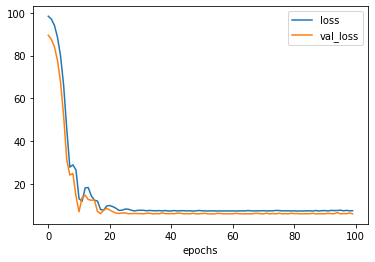

In [72]:
history_metrics.plot(x='epochs')

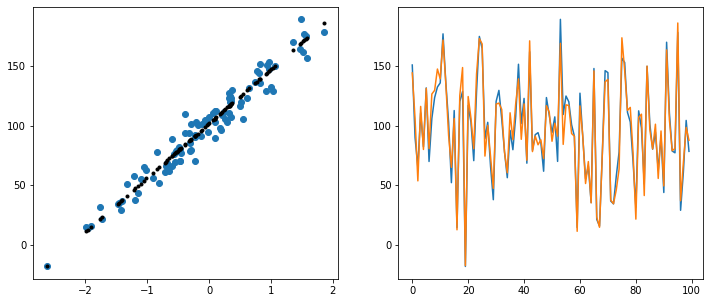

In [73]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

So I didn't introduce any activation/ non-linearity, and it is, no matter how deep the network is, a linear regression model.
Ha Ha Ha

### now a neural net with sigmoid applied

In [76]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


In [78]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error','mean_squared_error']
)

In [79]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

<AxesSubplot:xlabel='epochs'>

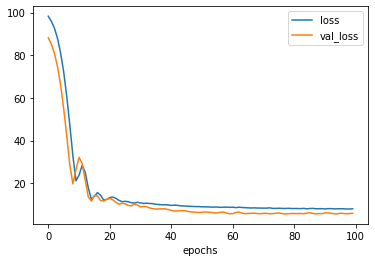

In [85]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs')

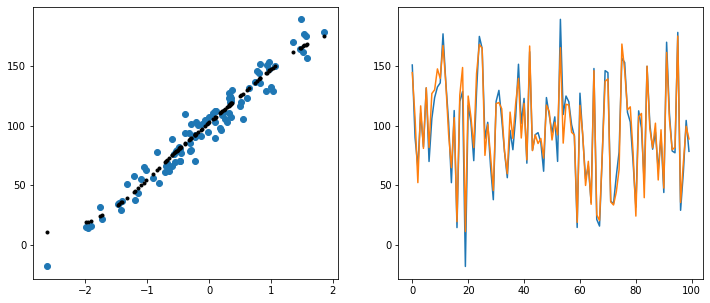

In [83]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

A little bit curved from sigmoid

### 2 sigmoids applied in the net

In [93]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=1) 
])

In [94]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 5)                 15        
                                                                 
 dense_18 (Dense)            (None, 5)                 30        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


In [95]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_squared_error']
)

In [99]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=500,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

<AxesSubplot:xlabel='epochs'>

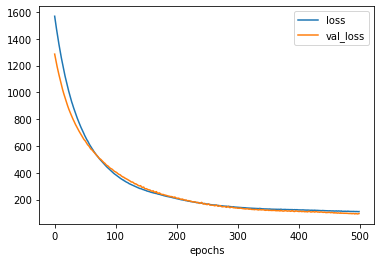

In [100]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs')

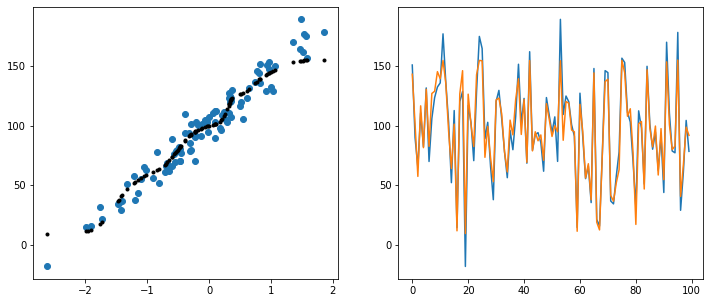

In [101]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)